In [1]:
''' 
 Risoluzione del problema di regressione della predizione del prezzo di 
 case in base alle features di queste utilizzando XGBoost Regressor
'''

import numpy as np # Utile per gestire gli array
import pandas as pd # Utile per gestire il dataframe
import matplotlib.pyplot as plt #Utile per stampare i grafici dei dati
import seaborn as sns # Utile sempre per stampare i grafici dei dati
import sklearn.datasets # Serve per importare i dataset di sklearn
from sklearn.model_selection import train_test_split # Utile per dividere il dataset in Training set e Test Set
from xgboost import XGBRegressor # Utile per importare il modello di regressione
from sklearn import metrics # Utile per utilizzare le metriche per verificare la bontà dei risultati

In [2]:
'''
 Il Dataset contiene 14 features per ogni casa.
 I dati sono presi da un dataset conteneti i dati di appartamenti
 in Boston (Kaggle)
'''
house_price_dataset = sklearn.datasets.load_boston()

'''
 Stampo a vista il prezzo per ogni appartamento
'''
#print(house_price_dataset)

'\n Stampo a vista il prezzo per ogni appartamento\n'

In [3]:
'''
 Carico il dataset mediante Pandas DataFrame
'''
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)

''' 
 Stampo a vista le prime 5 right del DataFrame
'''
#house_price_dataframe.head()

' \n Stampo a vista le prime 5 right del DataFrame\n'

In [4]:
''' 
 Aggiungo la colonna target (prezzo) al DataFrame
'''
house_price_dataframe['price'] = house_price_dataset.target

''' 
 Stampo a vista dataframe con aggiunto il prezzo
'''
#house_price_dataframe.head()

''' 
 Controllo la shape di datraframe
'''
#house_price_dataframe.shape
'''
 Controllo in caso vi siano dei valori mancanti e nulli
 che in questo caso sono assenti
'''
#house_price_dataframe.isnull().sum()
''' 
 Osservo le caratteristiche del dataset mediante la .describe()
'''
#house_price_dataframe.describe()

' \n Osservo le caratteristiche del dataset mediante la .describe()\n'

In [5]:
'''
 Calcolo della correlazione tra le varie features del dataset
 divisa in correlazione negative e positive mediante la funzione
 .corr()
'''

correlation = house_price_dataframe.corr()

'\n Esempio RAD è molto correlata (ovviamente) con se stessa ma anche con TAX \n mentre è poco correlata con B e DIS e price\n'

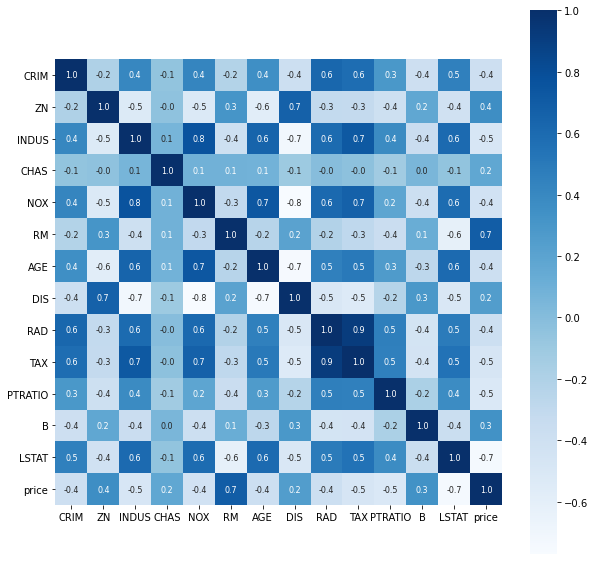

In [6]:
'''
 Stampa della heatmap per visualizzare e comprendere la correlazione tra le features
'''
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

'''
 Esempio RAD è molto correlata (ovviamente) con se stessa ma anche con TAX 
 mentre è poco correlata con B e DIS e price
'''

In [8]:
''' 
 Divido i dati in feature X e target feature Y
'''
X = house_price_dataframe.drop(['price'], axis=1)
Y = house_price_dataframe['price']

''' 
 Stampa di features X e target feature Y
'''

#print(X)
#print(Y)

' \n Stampa di features X e target feature Y\n'

In [9]:
'''
 Divisione in test e training set
'''
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

'''
 Stampa a vista dello shape training e test set
'''
#print(X.shape, X_train.shape, X_test.shape)

'\n Stampa a vista dello shape training e test set\n'

In [10]:
'''
 Caricamento del modello di regressione
'''
model = XGBRegressor()

In [11]:
''' 
 Effetto il fit del modello mediante la X e la Y del Training Set
'''
model.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [12]:
'''
 Effettuo delle predizioni caricando il modello di regressione
 e facendo .predict della variabile Y del traing set dalla
 variabile X del training set
'''
training_data_prediction = model.predict(X_train)

''' 
 Stampo le predizioni
'''

#print(training_data_prediction)

' \n Stampo le predizioni\n'

In [13]:
''' 
 Calcolo dell'errore R^2 sul training set
'''
score_1 = metrics.r2_score(Y_train, training_data_prediction)

'''
 Calcolo dell'errore assoluto medio sul training set
'''
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9999948236320982
Mean Absolute Error :  0.0145848437110976


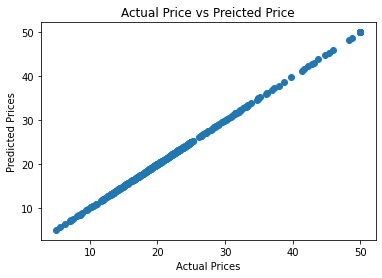

House: 321 True Value: (23.1K$) Predicted Value -> 23.1K$
House: 37 True Value: (21.0K$) Predicted Value -> 21.0K$
House: 286 True Value: (20.1K$) Predicted Value -> 20.1K$
House: 2 True Value: (34.7K$) Predicted Value -> 34.7K$
House: 25 True Value: (13.9K$) Predicted Value -> 13.9K$
House: 457 True Value: (13.5K$) Predicted Value -> 13.5K$
House: 120 True Value: (22.0K$) Predicted Value -> 22.0K$
House: 488 True Value: (15.2K$) Predicted Value -> 15.2K$
House: 427 True Value: (10.9K$) Predicted Value -> 10.9K$
House: 358 True Value: (22.7K$) Predicted Value -> 22.7K$
House: 474 True Value: (13.8K$) Predicted Value -> 13.8K$
House: 400 True Value: (5.6K$) Predicted Value -> 5.6K$
House: 188 True Value: (29.8K$) Predicted Value -> 29.8K$
House: 371 True Value: (50.0K$) Predicted Value -> 50.0K$
House: 199 True Value: (34.9K$) Predicted Value -> 34.9K$
House: 484 True Value: (20.6K$) Predicted Value -> 20.6K$
House: 53 True Value: (23.4K$) Predicted Value -> 23.4K$
House: 117 True Value

In [15]:
''' 
 Visualizzo il grafico dei valori target Y sul training set e le predizioni di Y
'''

plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

''' 
 Stampo il reale prezzo e quello previsto per ogni case del training set
'''

for i in range (len(Y_test)):
    print("House: "+str(Y_train[i:i+1]).split("    ")[0]+" True Value: ("+ str(Y_train[i:i+1]).split("    ")[1].split("\n")[0]+"K$) Predicted Value -> "+str(round(float(str(training_data_prediction[i])),1))+"K$")

In [16]:
'''
 Effettuo una predizione analoga con il test set
'''
test_data_prediction = model.predict(X_test)

In [17]:
'''
 Calcolo allo stesso modo l'errore R^2 sul test set
'''
score_1 = metrics.r2_score(Y_test, test_data_prediction)

'''
 Calcolo allo stesso modo l'errore assoluto medio sul test set
'''
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)
'''
 Notare che ovviamente l'errore assoluto medio è molto più alto 
'''

R squared error :  0.8711660369151691
Mean Absolute Error :  2.2834744154238233


"\n Notare che ovviamente l'errore assoluto medio è molto più alto \n"

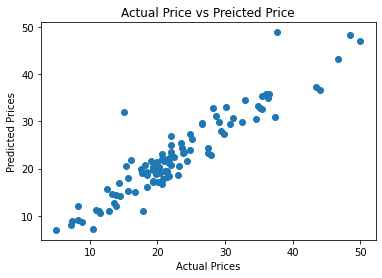

House: 463 True Value: (20.2K$) Predicted Value -> 20.3K$
House: 152 True Value: (15.3K$) Predicted Value -> 20.6K$
House: 291 True Value: (37.3K$) Predicted Value -> 31.0K$
House: 183 True Value: (32.5K$) Predicted Value -> 29.9K$
House: 384 True Value: (8.8K$) Predicted Value -> 8.6K$
House: 141 True Value: (14.4K$) Predicted Value -> 14.2K$
House: 240 True Value: (22.0K$) Predicted Value -> 23.5K$
House: 349 True Value: (26.6K$) Predicted Value -> 29.7K$
House: 410 True Value: (15.0K$) Predicted Value -> 32.0K$
House: 150 True Value: (21.5K$) Predicted Value -> 22.0K$
House: 175 True Value: (29.4K$) Predicted Value -> 27.9K$
House: 289 True Value: (24.8K$) Predicted Value -> 24.0K$
House: 67 True Value: (22.0K$) Predicted Value -> 20.8K$
House: 310 True Value: (16.1K$) Predicted Value -> 21.8K$
House: 376 True Value: (13.9K$) Predicted Value -> 12.0K$
House: 1 True Value: (21.6K$) Predicted Value -> 22.1K$
House: 221 True Value: (21.7K$) Predicted Value -> 18.5K$
House: 439 True Val

In [87]:
''' 
 Visualizzo il grafico dei valori target Y sul testset set e le predizioni di Y
'''

plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

'''
 NOTA: Ovviamente la predizione è meno precisa e sparsa e sono evidenti dei valori che sono
       stati completamente mal classificati
 
 Stampo il reale prezzo e quello previsto per ogni case del test set
'''       


for i in range (len(Y_test)):
    print("House: "+str(Y_test[i:i+1]).split("    ")[0]+" True Value: ("+ str(Y_test[i:i+1]).split("    ")[1].split("\n")[0]+"K$) Predicted Value -> "+str(round(float(str(test_data_prediction[i])),1))+"K$")
